# Bistable gene-regulatory networks

## Model definition

We consider the piecewise linear system defined in Filippov sense as in [Augier and Yabo (2021)][id1]. In synthetic biology, this model can represent a _genetic toggle switch_, a synthetic regulatory network designed by [Gardner et al. (2000)][id2] in the bacteria E. coli through two genes lacI and tetR mutually repressing each other. Dynamics is given by

[id1]: https://hal.archives-ouvertes.fr/hal-03099681
[id2]: https://pubmed.ncbi.nlm.nih.gov/10659857/

$$
\left\{ \begin{array}{l}
\dot x_1 = -\gamma_1 x_1 + u(t) k_1 s^{-}(x_2, \theta_2), \\
\dot x_2 = -\gamma_1 x_2 + u(t)k_2 s^{-}(x_1, \theta_1),
\end{array}
\right.
$$

where for $j\in \{1,2\}$, $x_j\in \mathbb{R}$, and for $\theta\in \mathbb{R}$, $s^{-}(\cdot,\theta):\mathbb{R}\to \mathbb{R}$ is such that

$$
    s^{-}(x,\theta)= \left\{ \begin{array}{ll}
    1 & \textit{if } x < \theta, \\
    0 & \textit{if } x > \theta,
    \end{array} \right.
$$

and the control $u(\cdot) \in L^\infty ([0,t_f],[u_{\text{min}},u_{\text{max}}])$, with $0<u_{\text{min}}<1 \leq u_{\text{max}}$. Such system is piecewise linear in $\mathbb{R}^2$ and, in particular, is linear in the regular domains

$$
\begin{array}{ll}
&B_{00}=\left\{(x_1,x_2)\in \mathbb{R}^2 \mid 0<x_1<\theta_1, \ 0<x_2<\theta_2\right\},\\
& B_{01}=\left\{(x_1,x_2)\in \mathbb{R}^2 \mid 0<x_1<\theta_1, \ \theta_2<x_2<\frac{k_2}{\gamma_2}\right\},\\
& B_{10}=\left\{(x_1,x_2)\in \mathbb{R}^2 \mid \theta_1<x_1<\frac{k_1}{\gamma_1}, \ 0<x_2<\theta_2\right\},\\
&B_{11}=\left\{(x_1,x_2)\in \mathbb{R}^2 \mid \theta_1<x_1<\frac{k_1}{\gamma_1}, \ \theta_2<x_2<\frac{k_2}{\gamma_2}\right\}.
\end{array}
$$

The following image shows the dynamics for the open loop system (i.e. $u \equiv 1$):

<img src="openloop.png" width=436 height=337>

## Time-optimal control problem

The optimal control problem involves minimizing the time of a state transfer from $B_{10}$ to $B_{01}$, and so is defined for the state $x(t) = (x_1(t),x_2(t))$ as 

$$
\left\{\begin{array}{l}
	\textit{minimize} \ t_f  \\
	\dot x = f(x),\\
 x(0) = x_0 \in B_{10}, \\ x_1(t_f)\in [0,\theta_1), \ x_2(t_f)=x_2^f > \theta_2, \\ u(\cdot) \in [u_{\text{min}},u_{\text{max}}].
\end{array}\right.
$$

with $f(x)$ being the right-hand side of the system previously introduced.

## Problem regularization

Bocop requires $s^-$ to be regularized to a smooth function. We then define, for $x\in \mathbb{R}$ and $k\in \mathbb{N}$, the Hill function

$$
\delta(x_i,\theta_i,k) = \frac{\theta_i^k}{x_i^k + \theta_i^k},
$$

which can approximate $s^-$ for large values of $k$ and, when $k \rightarrow \infty$, meets

$$
	\lim_{k \rightarrow \infty} \delta(x_i,\theta_i,k) = \left\{ \begin{array}{ll}
	1 & x_i < \theta_i, \\
	0 & x_i > \theta_i, \\
	1/2 & x_i = \theta_i.
	\end{array} \right.
$$

System parameters are fixed to $\gamma_1 = 1.2$, $\gamma_2 = 2$, $\theta_1 = 0.6$, $\theta_2 = 0.4$ and $k_1 = k_2 = 1$, and control bounds are set to $u_{min}=0.5$ and $u_{max}=1.5$. Initial conditions are set to $x_1(0) = 0.8$, $x_2(0)=0.3$ and $x_2(t_f) = 0.7$. The parameter $k$ of the Hill function is set to $k = 200$.

<font color=white>[Thumbnail](thumbnail.png)</font>

In [1]:
!pygmentize problem.cpp

// +++DRAFT+++ This class implements the OCP functions
// It derives from the generic class bocop3OCPBase
// OCP functions are defined with templates since they will be called
// from both the NLP solver (double arguments) and AD tool (ad_double arguments)
//#pragma once

#include <OCP.h>

template <typename Variable>
void OCP::finalCost(double initial_time, double final_time, const Variable *initial_state, const Variable *final_state, const Variable *parameters, const double *constants, Variable &final_cost)
{
  // Minimize final time
  final_cost = initial_state[2];
}

template <typename Variable>
void OCP::dynamics(double time, const Variable *state, const Variable *control, const Variable *parameters, const double *constants, Variable *state_dynamics)
{
	Variable x1 = state[0];
	Variable x2 = state[1];
	Variable tf = state[2];
	Variable u  = control[0];
	
	double g1 = constants[0];
	double g2 = constants[1];
	double t1 = constants[2];
	double t2 = constants[3];
	double k  = constan

In [2]:
%matplotlib inline
import bocop

In [3]:
problem_path = "." # using local problem definition
bocop.build(problem_path, cmake_options = '-DCMAKE_CXX_COMPILER=g++')

[EXEC] > ['cmake -DCMAKE_BUILD_TYPE=Debug -DPROBLEM_DIR=/opt/ct-gallery/gallery/examples/bistable -DCPP_FILE=problem.cpp  -DCMAKE_CXX_COMPILER=g++  /opt/ct-gallery/env/lib/python3.7/site-packages/bocop']
>	-- The C compiler identification is GNU 7.5.0
>	-- The CXX compiler identification is GNU 10.2.0
>	-- Detecting C compiler ABI info
>	-- Detecting C compiler ABI info - done
>	-- Check for working C compiler: /opt/ct-gallery/env/bin/x86_64-conda-linux-gnu-cc - skipped
>	-- Detecting C compile features
>	-- Detecting C compile features - done
>	-- Detecting CXX compiler ABI info
>	-- Detecting CXX compiler ABI info - done
>	-- Check for working CXX compiler: /usr/bin/g++ - skipped
>	-- Detecting CXX compile features
>	-- Detecting CXX compile features - done
>	-- Problem path: /opt/ct-gallery/gallery/examples/bistable
>	-- Using CPPAD found at /opt/ct-gallery/env/include/cppad/..
>	-- Using IPOPT found at /opt/ct-gallery/env/lib/libipopt.so
>	-- Found Python3: /opt/ct-gallery/env/bin/

0

State 0 and State 1 correspond to $x_1$ and $x_2$ respectively. State 2 represents the final time to minimize.

interactive(children=(IntSlider(value=113, continuous_update=False, description='iteration', max=113), Output(…

Done


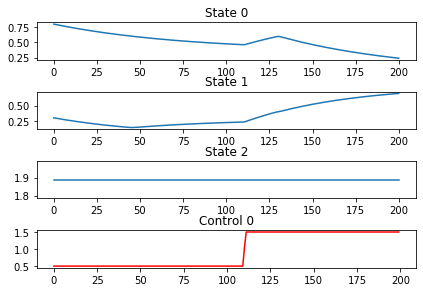

In [4]:
import matplotlib.pyplot as plt
bocop.run(problem_path)
plt.show()

Loading solution:  ./problem.sol


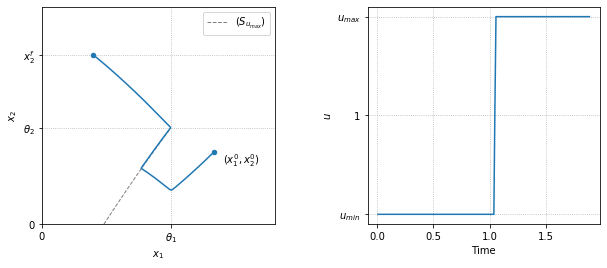

Final time is 1.88756560904673


In [5]:
import numpy as np

solution = bocop.readSolution(problem_path + "/problem.sol")
tf = solution.state[2][0]; t = solution.time_steps*tf
x1 = solution.state[0]; x2 = solution.state[1]
u = solution.control[0]

umin = 0.5
umax = 1.5
g1 = 1.4
g2 = 1.8
theta1 = 0.6
theta2 = 0.4
k1 = 1
k2 = 1
x1max = 0.9
x2max = 0.8

plt.figure(0, figsize=(10,4))
plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.subplot(121)
ax = plt.gca()
plt.xlabel('$x_1$'); plt.ylabel('$x_2$')
ax.set_ylim(0.,x1max); ax.set_xlim(0.,x2max)
xv = np.arange(0,theta1,0.01)
sumax = k2/g2*umax - (k2/g2*umax - theta2)*((k1/g1*umax - xv)/((k1/g1*umax - theta1)))**(g2/g1)
plt.plot(x1,x2,label='',zorder=3)
plt.plot(xv,sumax,'--', label='$(S_{u_{max}})$',linewidth=1, color='grey')
plt.legend()
plt.xlim([0,theta1*1.8])
ax.text(x1[0]+0.04, x2[0]-0.05, '$(x_1^0, x_2^0)$')
plt.scatter([x1[0],x1[-1]],[x2[0],x2[-1]], zorder=3, s=20)
plt.xticks([0, theta1], [0,'$\\theta_1$'])
plt.yticks([0, theta2, x2[-1]], [0,'$\\theta_2$','$x_2^f$'])
plt.grid(linestyle='dotted')

plt.subplot(122)
plt.plot(t[1:],u)
plt.xlabel('Time'); plt.ylabel('$u$')
plt.yticks([umin,1,umax], ['$u_{min}$', 1, '$u_{max}$'])
plt.grid(linestyle='dotted')

plt.show()

print("Final time is " + str(tf))

In [6]:
print("Bocop returns status {} with objective {:2.4g} and constraint violation {:2.4g}".format(solution.status,solution.objective,solution.constraints))
p0 = []
for i in range(solution.dim_state):
    p0.append(solution.costate[i][0])
print("Costate at first time stage (t0+h/2): ",p0)
print("Multipliers for initial conditions: ",solution.boundarycond_multipliers[0:solution.dim_state])

Bocop returns status 0 with objective 1.888 and constraint violation 1.486e-14
Costate at first time stage (t0+h/2):  [-2.21241861069235, 0.680215961376846, 0.99503700918767]
Multipliers for initial conditions:  [-2.18337787e+00  6.68757718e-01  1.38521948e-12]
